<a href="https://colab.research.google.com/github/AvotraRan/test-live-coding-2/blob/master/Santatriniaina_Avotra_Randrianambinina_LogRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [2]:
##### WRITE YOUR CODE HERE #####
path= '/content/diabetes.csv'
data=pd.read_csv("diabetes.csv")
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [3]:
##### WRITE YOUR CODE HERE #####
data.head()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [4]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [5]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [6]:
##### WRITE YOUR CODE HERE #####
def scale(x):
  x=data-data.mean()
  x=data/data.std()
  return x
#### END CODE ####

In [7]:
scale(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.780638,4.628961,3.719814,2.194052,0.000000,4.261709,1.892381,4.251617,2.09665
1,0.296773,2.658525,3.409829,1.817929,0.000000,3.373853,1.059371,2.636003,0.00000
2,2.374184,5.723648,3.306501,0.000000,0.000000,2.955293,2.028198,2.721035,2.09665
3,0.296773,2.783632,3.409829,1.441806,0.815661,3.564108,0.504031,1.785679,0.00000
4,0.000000,4.284917,2.066563,2.194052,1.457777,5.466657,6.905531,2.806067,2.09665
...,...,...,...,...,...,...,...,...,...
763,2.967731,3.158953,3.926470,3.008986,1.561903,4.172924,0.516104,5.357037,0.00000
764,0.593546,3.815765,3.616486,1.692555,0.000000,4.667586,1.026172,2.295873,0.00000
765,1.483865,3.784488,3.719814,1.441806,0.971851,3.323119,0.739447,2.550970,0.00000
766,0.296773,3.940872,3.099845,0.000000,0.000000,3.817781,1.053335,3.996520,2.09665


Question 5: Scale your features, except the target. 

In [8]:
##### WRITE YOUR CODE HERE #####
data.iloc[:,:-1]=scale(data.iloc[:,:-1])
data
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.780638,4.628961,3.719814,2.194052,0.000000,4.261709,1.892381,4.251617,1
1,0.296773,2.658525,3.409829,1.817929,0.000000,3.373853,1.059371,2.636003,0
2,2.374184,5.723648,3.306501,0.000000,0.000000,2.955293,2.028198,2.721035,1
3,0.296773,2.783632,3.409829,1.441806,0.815661,3.564108,0.504031,1.785679,0
4,0.000000,4.284917,2.066563,2.194052,1.457777,5.466657,6.905531,2.806067,1
...,...,...,...,...,...,...,...,...,...
763,2.967731,3.158953,3.926470,3.008986,1.561903,4.172924,0.516104,5.357037,0
764,0.593546,3.815765,3.616486,1.692555,0.000000,4.667586,1.026172,2.295873,0
765,1.483865,3.784488,3.719814,1.441806,0.971851,3.323119,0.739447,2.550970,0
766,0.296773,3.940872,3.099845,0.000000,0.000000,3.817781,1.053335,3.996520,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [9]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [10]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [11]:
from matplotlib import axis
class logistic_regression:
  def __init__(self, x_test, y_test, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters=num_iters
    self.threshold=threshold
    self.tolerance=tolerance
    self.lr=lr
    self.theta=None
    self.cost_history=[]
    self.cost_history_test=[]
    self.x_test=x_test
    self.y_test=y_test
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    # x_new=np.ones((len(x),1))
    # x_new=np.c_[np.ones((x.shape[0])),x]
    x_new=np.hstack([np.ones((x.shape[0],1)),x])
    # x_new = np.concatenate((np.ones((len(x),1)) , x ), axis = 1)
    return x_new
    #### END CODE ####

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    z=x@theta
    return 1/(1+np.exp(-z)) 
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    y_pred = self.sigmoid(x,self.theta)
    Cost = -np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))/n
        
    return Cost
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x=self.add_ones(x)# Add ones to x
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
    self.x_test=self.add_ones(self.x_test)
    self.y_test=self.y_test.reshape(-1,1)
    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1
    
    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x, self.theta) # using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T@(y-y_pred)
      grad= grad.reshape(-1,1) # Reshape, if it is needed

      # update rules
      self.theta= self.theta-self.lr*grad
      # Compute the training loss
      self.cost_history.append(self.cross_entropy(x, y))
      self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test))

      # Convergence criteria:
      if current_iter % 100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    proba=self.predict_proba(x) # Get probability of x
    result= [1 if (k >=self.threshold)  else 0 for k in proba] # Convert proba to 0 or 1. hint: list comprehension
    return result
    
  def predict_proba(self, x):
    x=self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x, self.theta)# Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    # plt.xlabel('Epoch')
    # plt.ylabel('Cost')
    # plt.plot(np.arange(len(self.cost_history)), self.cost_history, 'r', label='Train loss')
    # plt.plot(np.arange(len(self.cost_history_test)), self.cost_history_test, 'b', label='Test loss')
    plt.plot(np.arange(len(self.cost_history)),self.cost_history, label='Train loss', color='r')
    plt.plot(np.arange(len(self.cost_history_test)),self.cost_history_test, label='Test loss', color='b')
    plt.legend()
    plt.show()
    #### END CODE ####

In [12]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test, y_test,num_iters=10000)

In [13]:
# %%time
model.fit(x_train, y_train)

cost for 100 iteration : 0.6483156698358863
cost for 200 iteration : 0.6389746712916129
cost for 300 iteration : 0.6317045149468534
cost for 400 iteration : 0.6259696230613263
cost for 500 iteration : 0.6213773921383647
cost for 600 iteration : 0.6176412162797619
cost for 700 iteration : 0.6145516076915143
cost for 800 iteration : 0.6119547323428463
cost for 900 iteration : 0.6097368678884717
cost for 1000 iteration : 0.6078132872255676
cost for 1100 iteration : 0.6061203384552801
cost for 1200 iteration : 0.6046097953079936
cost for 1300 iteration : 0.6032448097507718
cost for 1400 iteration : 0.6019969945818608
cost for 1500 iteration : 0.6008443054587023
cost for 1600 iteration : 0.5997694914973303
cost for 1700 iteration : 0.5987589529031229
cost for 1800 iteration : 0.5978018920982352
cost for 1900 iteration : 0.596889678075803
cost for 2000 iteration : 0.5960153668432818
cost for 2100 iteration : 0.5951733369890193
cost for 2200 iteration : 0.5943590107837144
cost for 2300 iterat

In [14]:
pred= model.predict(x_test)

In [15]:
pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [16]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.22522381]
 [0.24900339]
 [0.30329256]
 [0.24760874]
 [0.4742284 ]
 [0.68034469]
 [0.35323382]
 [0.37715837]
 [0.19674649]
 [0.31655546]
 [0.21946331]
 [0.63471858]
 [0.54289956]
 [0.19835783]
 [0.42585094]
 [0.25243733]
 [0.35189165]
 [0.46926202]
 [0.29180476]
 [0.26812029]
 [0.22296968]
 [0.48375381]
 [0.27302395]
 [0.37389751]
 [0.3912132 ]
 [0.4937476 ]
 [0.13711999]
 [0.45684048]
 [0.42843232]
 [0.36652895]
 [0.63243438]
 [0.50258016]
 [0.22993614]
 [0.36939549]
 [0.15688213]
 [0.362065  ]
 [0.61950673]
 [0.30003501]
 [0.21214812]
 [0.61068478]
 [0.27222243]
 [0.44183546]
 [0.86936137]
 [0.67024798]
 [0.36043379]
 [0.26428048]
 [0.30060193]
 [0.50374186]
 [0.2925978 ]
 [0.23249026]
 [0.29855716]
 [0.40063819]
 [0.50065071]
 [0.1576973 ]
 [0.5411831 ]
 [0.26049137]
 [0.34700233]
 [0.56269738]
 [0.33176061]
 [0.49342491]
 [0.66554414]
 [0.49025055]
 [0.27267788]
 [0.13714349]
 [0.27438194]
 [0.33642061]
 [0.72605691]
 [0.24818665]
 [0.35345176]
 [0.48094466]
 [0.48340406]
 [0.47

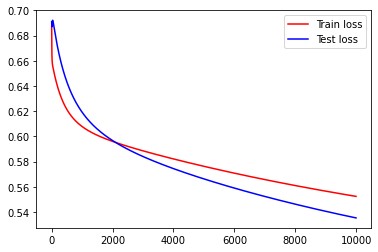

In [17]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [18]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [19]:
! git clone https://github.com/{username}/{my_repository}.git

Cloning into 'github.com'...
fatal: could not read Username for 'https://github.com': No such device or address


In [20]:
! git remote -v

fatal: not a git repository (or any of the parent directories): .git


Copy data to test-live-coding folder

In [21]:
!cp diabetes.csv /content/test-live-coding

In [22]:
%cd /content/test-live-coding

[Errno 20] Not a directory: '/content/test-live-coding'
/content


In [23]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [24]:
!git config user.email useremail
!git config user.name username

fatal: not in a git directory
fatal: not in a git directory


In [25]:
!git add .
!git commit -m "Add my files"

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [26]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [27]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


# If you cannot push, use:

In [28]:
!git remote rm origin

fatal: not a git repository (or any of the parent directories): .git


In [29]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [30]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [31]:
class logistic_regression_l1:
  pass

In [32]:
class logistic_regression_l2:
  pass

In [33]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?